# Assignment 2: Graphing Dino Fun World

### Assignment Description

Impressed by your previous work, the administrators of Dino Fun World have asked you to create some charts that they can use in their next presentation to upper management. The data used for this assignment will be the same as the data used for the previous assignment.

The administrators would like you to create four graphs:

Chart 1: A pie chart depicting visits to thrill ride attractions.

Chart 2: A bar chart depicting total visits to food stalls.

* Please query attractions with Category equal to "Food".

Chart 3: A line chart depicting attendance at the newest ride, Atmosfear over the course of the 3 days.

* For this question, use data from the table "sequences". You can assume that all activity sequences are aligned by time (i.e., the first node of all sequences occurred at the same time) and are of the same length.

* You need to consider all 3 days (16 hours per day) of records in the sequences, which is considered the open hours of the park in one day. Specifically, because an activity sequence from the "sequences" table was updated/recorded every 5 minutes, you need to extract all the 576 items (16h * 60m / 5m = 192, 192 * 3 days = 576).

* Your data list (which will be printed) must be in the format of tuple list (or list of lists). The first item in tuples is irrelevant, but you can put in some meaningful information. The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (574, 4), (575, 5) ].

Chart 4: A box-and-whisker plot depicting total visits to the park's Kiddie Rides.

* The to-be-printed, the  data list must be ordered by AttractionID (a field in the table "attraction").

**Hint:**  Use “%matplotlib inline” to display the graph on the Jupyter Notebook(To allow the grader to identify the PartID, add the cell magic after the Graded Cell and PartID comments.).


### Directions

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkin', 'attractions', and 'sequences'. The database file is named 'dinofunworld.db' and is available in the read only directory of the Jupyter Notebook environment (i.e., readonly/dinofunworld.db). It can also be accessed by selecting File > Open > readonly/dinofunworld.db.

The information contained in each of these tables is listed below:

`checkin`:
    - The check-in data for all visitors for the day in the park. The data includes two types of check-ins: inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carousel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
Using the provided data, create the four visualizations that the administration requested: the pie chart, bar chart, line chart, and box-and-whisker plot.   

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly.

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

**NOTE:**  For each question, be sure to add your code in the exact cell that has the comment ```"# Graded Cell, PartID:______"```. If you add extra cells or split your code up into multiple cells, ensure you are adding your output print( ) statement and the chart in the cell containing the comment with regard to each question.


**NOTE:**  If you lose the partId that is mentioned in the first line of each cell with regard to each question, use the syntax described below to add it.
* Question 1: # Graded Cell, PartID : gtMqY 
* Question 2: # Graded Cell, PartID : 9Ocyl
* Question 3: # Graded Cell, PartID : 0zcEV
* Question 4: # Graded Cell, PartID : zdzaT

### Question 1 : 
Make a Pie Chart of the visits to Thrill Ride attractions.

**Note:** For this question, display the pie chart in the notebook and print the data used to create the pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])


In [88]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=sqlite3.connect('dinofunworld-1.db')
pointer=data.cursor()



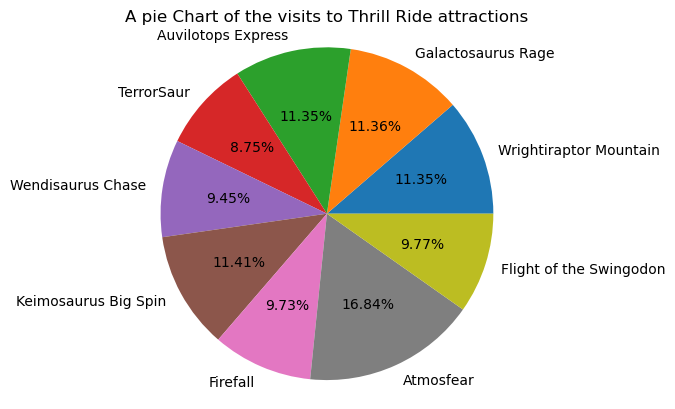

[['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Auvilotops Express', 18694], ['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Keimosaurus Big Spin', 18792], ['Firefall', 16024], ['Atmosfear', 27747], ['Flight of the Swingodon', 16093]]


In [104]:
# Graded Cell, PartID: gtMqY
# your code here
pointer.execute("SELECT attraction.Name,count(checkin.visitorID) FROM attraction INNER JOIN checkin on attraction.attractionID=checkin.attraction WHERE attraction.Category LIKE '%Thrill%' GROUP BY checkin.attraction ORDER BY attraction.attractionID")
q1=pointer.fetchall()
#visit_stats = pd.DataFrame.from_records(q1)
q1_data = pd.DataFrame.from_records(q1, columns=['Name', 'Count'])
plt.pie(q1_data['Count'], labels=q1_data['Name'], autopct='%0.2f%%', shadow=False)
plt.axis('equal')
plt.title('A pie Chart of the visits to Thrill Ride attractions')
plt.show()
print(q1_data.values.tolist())

### Question 2 : 
Make a bar chart of total visits to food stalls.

**Note:** For this question, display the bar chart in the notebook and print the data used to create the bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])


[('Theresaur Food Stop', 1116), ('Paleo Shreckwiches', 1361), ("Shilobite o'Pizza", 1393), ('Krystal Cook Cafe', 1725), ('Granite Slab Pizza', 2810), ('Plaisantly Popped Corn', 2914), ('Permafrosties', 3018), ('EberTrex Fries', 3018), ('Smoky Wood BBQ', 3037), ('Chensational Sweets', 3049), ('Floral Funnels', 3083), ('Ice Age Cones', 3228)]


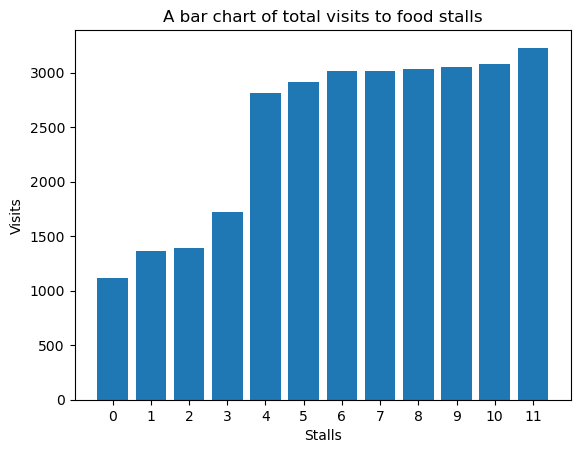

In [105]:
# Graded Cell, PartID: 9Ocyl
# your code here
pointer.execute("SELECT attraction.name,COUNT(checkin.visitorID) AS cnt FROM attraction INNER JOIN checkin ON attraction.attractionID=checkin.attraction WHERE attraction.category LIKE '%Food%' GROUP BY checkin.attraction ORDER BY cnt")
q2=pointer.fetchall()
print(q2)

q2_data=pd.DataFrame.from_records(q2,columns=['name','count'])
plt.bar(range(len(q2_data['name'])), q2_data['count'])

plt.ylabel('Visits')
plt.xlabel('Stalls')
plt.xticks([x for x in range(len(q2_data['name']))])
plt.title('A bar chart of total visits to food stalls')
plt.show()




### Question 3 : 
Make a line chart of attendance at Atmosfear every five minutes, for a period of all 3 days (0~575).

**Note:** For this question, display the line chart in the notebook and print the data used to create the chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...]) or tuple lists (ex: [('Stall 1, 10),('Stall 2', 50), ...]

The first item in tuples is irrelevant, but you can put in some meaningful information. The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (574, 4), (575, 5) ].

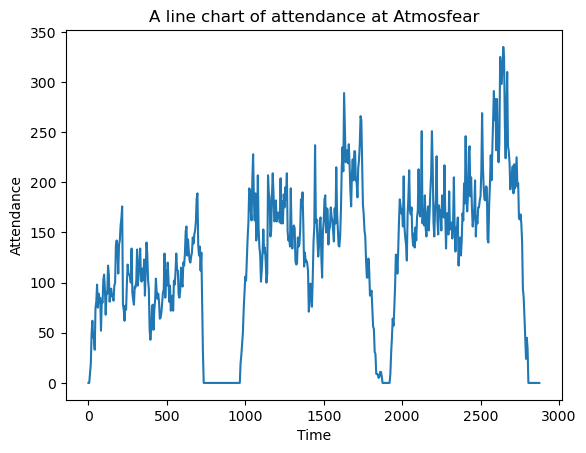

[(0, 0), (5, 0), (10, 9), (15, 19), (20, 49), (25, 62), (30, 46), (35, 44), (40, 33), (45, 75), (50, 81), (55, 98), (60, 75), (65, 89), (70, 80), (75, 85), (80, 52), (85, 82), (90, 80), (95, 103), (100, 108), (105, 93), (110, 68), (115, 90), (120, 89), (125, 117), (130, 108), (135, 81), (140, 89), (145, 94), (150, 87), (155, 85), (160, 82), (165, 97), (170, 100), (175, 137), (180, 142), (185, 134), (190, 109), (195, 138), (200, 142), (205, 157), (210, 164), (215, 176), (220, 78), (225, 73), (230, 62), (235, 77), (240, 73), (245, 99), (250, 118), (255, 109), (260, 108), (265, 106), (270, 100), (275, 134), (280, 90), (285, 83), (290, 78), (295, 96), (300, 95), (305, 102), (310, 133), (315, 97), (320, 110), (325, 121), (330, 134), (335, 102), (340, 101), (345, 114), (350, 103), (355, 123), (360, 87), (365, 111), (370, 140), (375, 129), (380, 103), (385, 94), (390, 53), (395, 43), (400, 53), (405, 76), (410, 78), (415, 53), (420, 73), (425, 82), (430, 104), (435, 91), (440, 84), (445, 89),

In [106]:
# Graded Cell, PartID: 0zcEV
# your code here
pointer.execute("SELECT attractionId, Name FROM attraction where attraction.Name = 'Atmosfear';")
attraction_ID = pointer.fetchone()[0]
pointer.execute("SELECT visitorID, sequence FROM sequences where sequence LIKE '%" + str(attraction_ID) + "%';")
sequence = pointer.fetchall()
q3 = pd.DataFrame.from_records(sequence, columns=['visitor', 'sequence'])
q3['sequence_list'] = q3['sequence'] \
.apply(lambda s: [1 if x == str(attraction_ID) else 0 for x in s.split("-")])
count = np.sum(q3['sequence_list'].values.tolist(), axis=0)
range_setting = range(0, len(count)*5, 5)
plt.plot(range_setting, count)
plt.ylabel('Attendance')
plt.xlabel('Time')
plt.title('A line chart of attendance at Atmosfear')
plt.show()
ans = [(range_setting[i], count[i]) for i in range(len(range_setting))]
print(ans)


### Question 4: 
Make a box plot of total visits to rides in the Kiddie Rides category.

**Note:** For this question, display the box plot in the notebook and print the number of visits to each ride as a list (ex: [3, 4, 5, 6, ...])

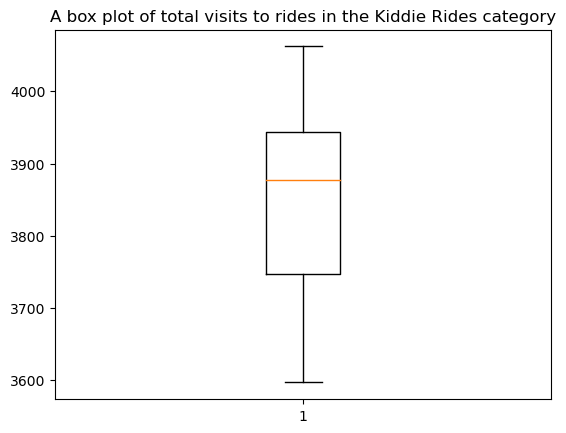

[3597, 3759, 4062, 3640, 3747, 3963, 3747, 3925, 3922, 4022, 3877]


In [108]:
# Graded Cell, PartID: zdzaT
# your code here
pointer.execute("SELECT attraction.Name,count(checkin.visitorID) FROM attraction INNER JOIN checkin on attraction.attractionID=checkin.attraction WHERE attraction.Category LIKE '%Kiddie Rides%' GROUP BY checkin.attraction ORDER BY attraction.attractionID")
q4=pointer.fetchall()
visit_stats = pd.DataFrame.from_records(q4, columns=['Name', 'Count'])
plt.boxplot(visit_stats['Count'])
plt.title('A box plot of total visits to rides in the Kiddie Rides category')
plt.show()
ans=[]
for i in q4:
    ans.append(i[1])
print(ans)
